# Librerias

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2 import sqrt

# Funciones

In [9]:
def load_image(image_path):
    """Carga una imagen desde la ruta especificada."""
    img = cv2.imread(image_path)
    if img is None:
        print("No se pudo cargar la imagen.")
    return img

In [10]:
def save_image(img, save_path):
    """Guarda la imagen procesada en la ruta especificada."""
    cv2.imwrite(save_path, img)

In [11]:
def display_image(img,title = "Imagen procesada"):
    """Muestra la imagen en una ventana utilizando matplotlib."""
    plt.imshow(img,cmap = 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [12]:
def apply_fourier(img):
    """Aplica la transformada de Fourier a la imagen y devuelve el espectro de magnitud."""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return magnitude_spectrum

def show_fourier_spectrum(img, magnitude_spectrum):
    """Muestra la imagen original y el espectro de Fourier utilizando matplotlib."""
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
    plt.title('Espectro de Fourier')
    plt.axis('off')

    plt.show()

In [13]:
def rgb2yiq(rgb_image):
    """
    Convierte una imagen de RGB a YIQ.
    """
    rgb_image = rgb_image / 255.0
    
    transformation_matrix = np.array([[0.299, 0.587, 0.114],
                                      [0.595, -0.274, -0.321],
                                      [0.211, -0.522, 0.311]])
    
    yiq_image = np.dot(rgb_image, transformation_matrix.T)
    return np.clip(yiq_image, 0, 1)

def yiq2rgb(yiq_image):
    """Convierte de YIQ a RGB."""
    transformation_matrix = np.array([[1.0, 0.966, 0.621],
                                      [1.0, -0.272, -0.647],
                                      [1.0, -1.107, 1.704]])
    

    rgb_image = np.dot(yiq_image, transformation_matrix.T)
    rgb_image = np.clip(rgb_image * 255.0, 0, 255).astype(np.uint8)
    return rgb_image

# Ejercicios

## YIQ

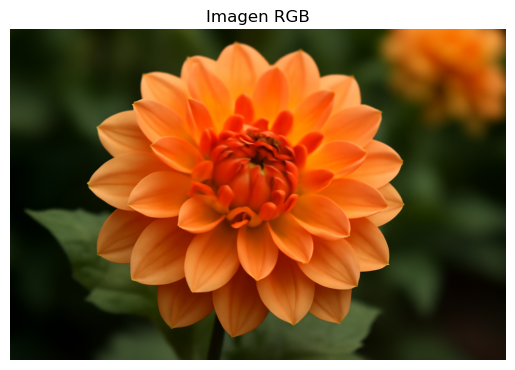

In [60]:
img = load_image('Imagenes/image_gpt.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_image(rgb_image,'Imagen RGB')

In [217]:
#y_channel = yiq_image[:, :, 0]  # Canal Y (Luminancia)
#i_channel = yiq_image[:, :, 1]  # Canal I (Fase de color - rojo-verde)
#q_channel = yiq_image[:, :, 2]  # Canal Q (Fase de color - azul-verde)

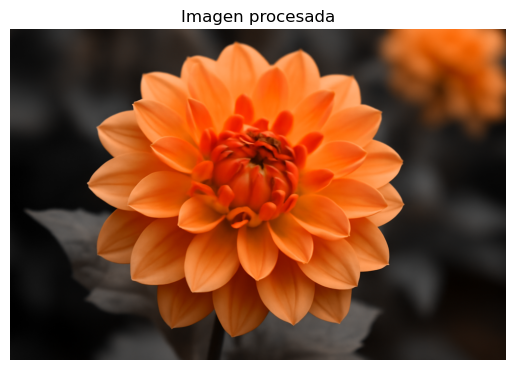

In [83]:
yiq_image = rgb2yiq(rgb_image)


#yiq_image[:,:,0] *= 2 
#yiq_image[:,:,0] =np.clip(yiq_image[:,:,0],0,1)
#yiq_image[:,:,1] *= 1.5
#yiq_image[:,:,2] *= 3
new_rgb = yiq2rgb(yiq_image)
display_image(new_rgb)

In [76]:
y_channel = yiq_image[:, :, 0]
if np.all(y_channel <= 1):
    print("La condición Y' <= 1 se cumple.")
else:
    print("Error: Algunos valores de Y' están fuera de rango.")

# Verificación de I
i_channel = yiq_image[:, :, 1]
if np.all((i_channel > -0.5957) & (i_channel < 0.5957)):
    print("La condición -0.5957 < I' < 0.5957 se cumple.")
else:
    print("Error: Algunos valores de I' están fuera de rango.")

# Verificación de Q
q_channel = yiq_image[:, :, 2]
if np.all((q_channel > -0.5226) & (q_channel < 0.5226)):
    print("La condición -0.5226 < Q' < 0.5226 se cumple.")
else:
    print("Error: Algunos valores de Q' están fuera de rango.")

La condición Y' <= 1 se cumple.
La condición -0.5957 < I' < 0.5957 se cumple.
La condición -0.5226 < Q' < 0.5226 se cumple.


## Paleta de colores

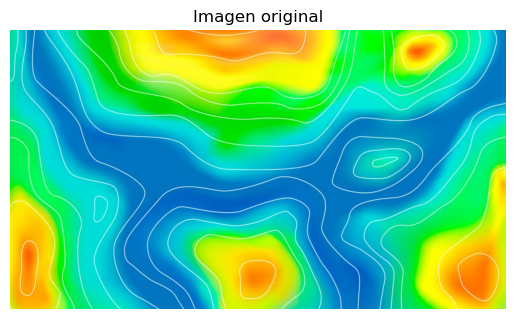

In [20]:
img = load_image('Imagenes\Heatmap-1024x576.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_image(img,'Imagen original')

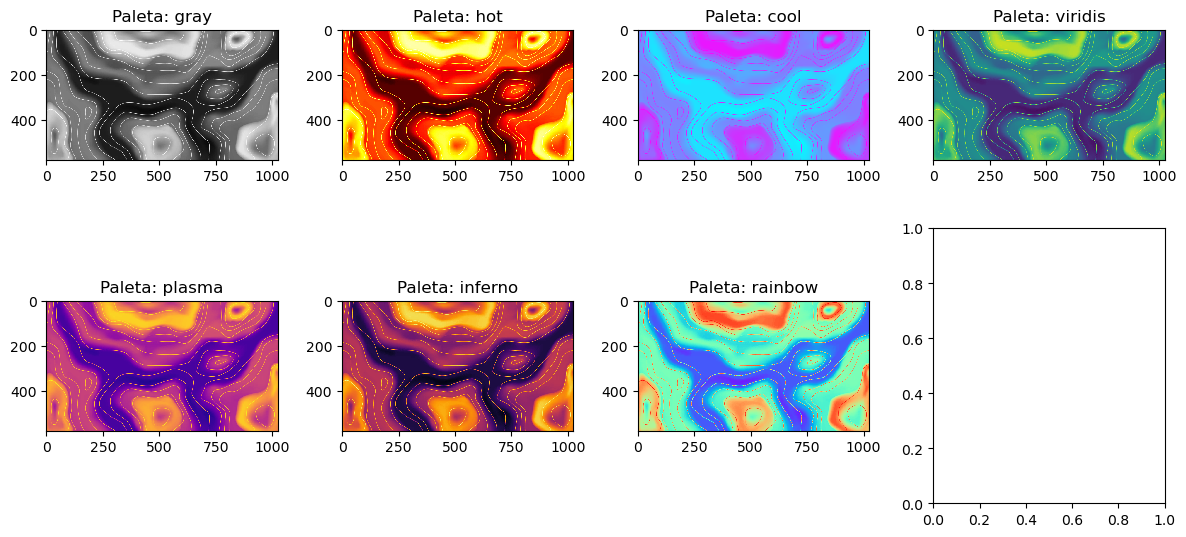

In [25]:
img = cv2.imread('Imagenes\Heatmap-1024x576.png', cv2.IMREAD_GRAYSCALE) 
paletas_colores = ['gray', 'hot', 'cool', 'viridis', 'plasma', 'inferno', 'rainbow']

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, palette in enumerate(paletas_colores):
    axs[i//4, i%4].imshow(img, cmap=palette, interpolation='nearest')
    axs[i//4, i%4].set_title(f'Paleta: {palette}')

plt.tight_layout()
plt.show()


## Aritmetica de pixels

In [27]:
image1 = cv2.cvtColor(load_image('Imagenes/Heatmap-1024x576.png'), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(load_image('Imagenes/image_gpt.png'), cv2.COLOR_BGR2RGB)

In [33]:
# Resize de imagenes

if image1.shape != image2.shape:
    image2 = cv2.resize(image2,(image1.shape[1],image1.shape[0]))

In [43]:
print(image1.shape,'--',image2.shape)

(576, 1024, 3) -- (576, 1024, 3)


In [36]:
yiq_image1 = rgb2yiq(image1)
yiq_image2 = rgb2yiq(image2)

In [37]:
Y_img1 = yiq_image1[:,:,0]
Y_img2 = yiq_image2[:,:,0]

I_img1 = yiq_image1[:,:,1]
I_img2 = yiq_image2[:,:,1]

Q_img1 = yiq_image1[:,:,2]
Q_img2 = yiq_image2[:,:,2]

In [54]:
#Suma campleada
#Y_img_new = np.clip((Y_img1 + Y_img2), 0, 1)

#Suma promediada
Y_img_new = (Y_img1 + Y_img2) / 2
I_img_new = (Y_img1*I_img1 + Y_img2*I_img2) / (Y_img1 + Y_img2)
Q_img_new = (Y_img1*Q_img1 + Y_img2*Q_img2) / (Y_img1 + Y_img2)


In [55]:
img_new = np.dstack([Y_img_new,I_img_new,Q_img_new])

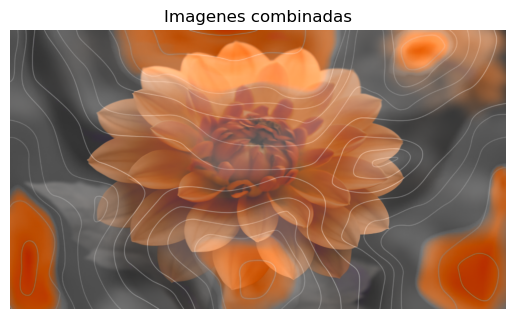

In [56]:
display_image(yiq2rgb(img_new),'Imagenes combinadas')

# Histograma de luminancia

Text(0, 0.5, 'Frecuencia')

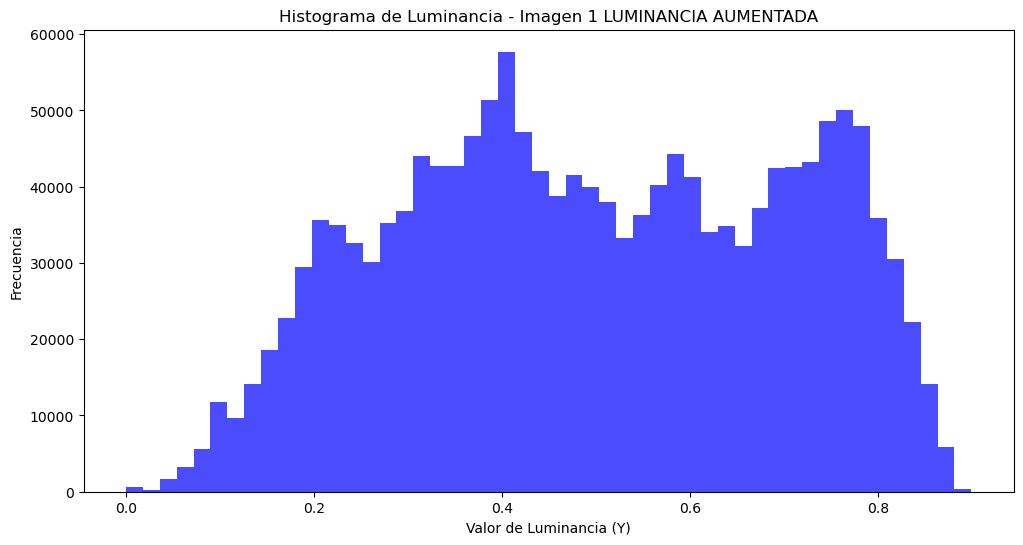

In [85]:
plt.figure(figsize=(12, 6))
#Aumento de luminancia 
yiq_image[:,:,0] = sqrt(yiq_image[:,:,0])
# Histograma de la imagen 1
plt.hist(yiq_image[:,:,0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Luminancia - Imagen 1 LUMINANCIA AUMENTADA')
plt.xlabel('Valor de Luminancia (Y)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

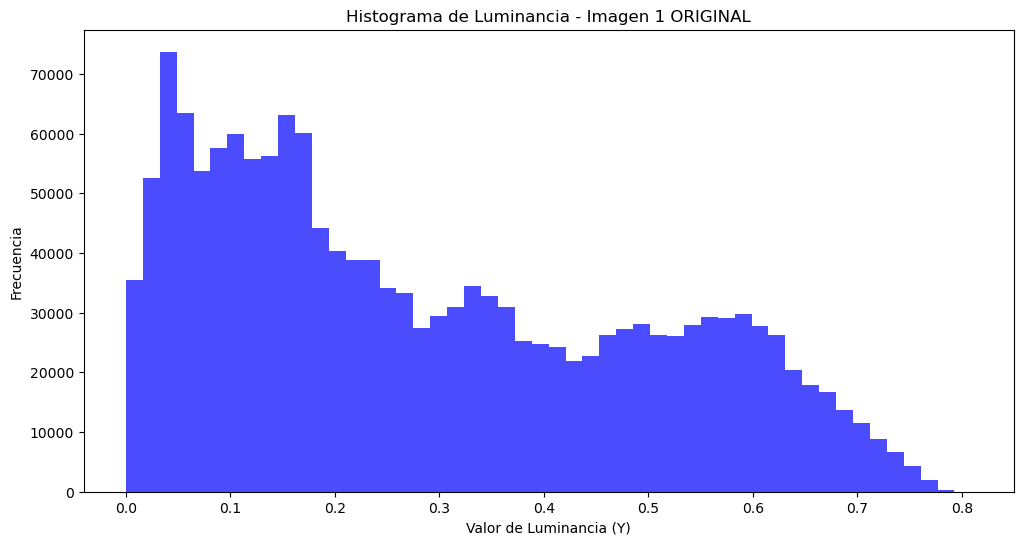

In [84]:
plt.figure(figsize=(12, 6))

# Histograma de la imagen 1
plt.hist(yiq_image[:,:,0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Luminancia - Imagen 1 ORIGINAL' )
plt.xlabel('Valor de Luminancia (Y)')
plt.ylabel('Frecuencia')